In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style("whitegrid")
sns.set_context("paper")
# 设置风格、尺度

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

UsageError: Line magic function `%` not found.


In [2]:
carveme_df = pd.read_excel('/home/dengxiao/mqc/tmp/carveme_new.xlsx')
carveme_biomass = carveme_df['biomass']
bigg_df = pd.read_excel('/home/dengxiao/mqc/tmp/bigg_new2.xlsx')
bigg_biomass = bigg_df['biomass']
metanetx_df = pd.read_excel('/home/dengxiao/mqc/tmp/metanetx_new.xlsx')
metanetx_biomass = metanetx_df['biomass']
seed_df = pd.read_excel('/home/dengxiao/mqc/tmp/seed_new.xlsx')
seed_biomass = seed_df['biomass']
virtual_df = pd.read_excel('/home/dengxiao/mqc/tmp/virtual_new.xlsx')
virtual_biomass = virtual_df['biomass']

In [ ]:
for index,row in seed_df.iterrows():
    print(index,row['NADH'])

In [6]:
carveme_initial, carveme_final, bigg_initial, bigg_final, metanetx_initial, metanetx_final, seed_initial, seed_final, virtual_initial, virtual_final = [], [],[],[],[], [],[],[],[],[]
for k in carveme_biomass:
    if not pd.isna(k) and k != '无' and 'nan' not in k:
        k = eval(k)
        if k[0]<200 and k[1]<80:
            carveme_initial.append([k[0],'initial','carveme',2])
            carveme_final.append([k[1],'final','carveme',2])
for k in bigg_biomass:
    if not pd.isna(k) and k != '无' and 'nan' not in k:
        k = eval(k)
        if k[0]<200 and k[1]<80:
            bigg_initial.append([k[0],'initial','bigg',3])
            bigg_final.append([k[1],'final','bigg',3])
for k in metanetx_biomass:
    if not pd.isna(k) and k != '无' and 'nan' not in k:
        k = eval(k)
        if k[0]<200 and k[1]<80:
            metanetx_initial.append([k[0],'initial','metanetx',4])
            metanetx_final.append([k[1],'final','metanetx',4])
for k in seed_biomass:
    if not pd.isna(k) and k != '无' and 'nan' not in k:
        k = eval(k)
        if k[0]<200 and k[1]<200:
            seed_initial.append([k[0],'initial','seed',5])
            seed_final.append([k[1],'final','seed',5])
for k in virtual_biomass:
    if not pd.isna(k) and k != '无' and 'nan' not in k:
        k = eval(k)
        if k[0]<200 and k[1]<80:
            virtual_initial.append([k[0],'initial','virtual',3])
            virtual_final.append([k[1],'final','virtual',3])

In [ ]:
for k in virtual_biomass:
    if not pd.isna(k):
        k = eval(k)
        if k[1]>20:
            print(k[1])

In [7]:
headers= ['biomass','tip','database','size']
control_analysis = []
control_analysis.extend(carveme_initial)
control_analysis.extend(carveme_final)
control_analysis.extend(bigg_initial)
control_analysis.extend(bigg_final)
control_analysis.extend(metanetx_initial)
control_analysis.extend(metanetx_final)
control_analysis.extend(seed_initial)
control_analysis.extend(seed_final)
control_analysis.extend(virtual_initial)
control_analysis.extend(virtual_final)
# 创建一个数据框（DataFrame）
df = pd.DataFrame(control_analysis,columns=headers)
# 尝试读取现有文件
try:
    existing_df = pd.read_excel('/home/dengxiao/mqc/tmp/tips_analysis.xlsx', sheet_name='Sheet1')
    # 将新的数据追加到现有数据框
    existing_df = existing_df.append(df, ignore_index=True)
except FileNotFoundError:
    # 如果文件不存在，直接使用新数据框
    existing_df = df
# 将数据框写入Excel文件
existing_df.to_excel('/home/dengxiao/mqc/tmp/tips_analysis.xlsx', index=False, header=True, sheet_name='Sheet1')

   biomass      tip database  size
0    21.07  initial  carveme     2
1    36.52  initial  carveme     2
2    13.85  initial  carveme     2
3    57.49  initial  carveme     2
4    40.31  initial  carveme     2
carveme     11378
virtual       586
bigg          170
seed          138
metanetx       80
Name: database, dtype: int64


Text(0, 0.5, 'Biomass')

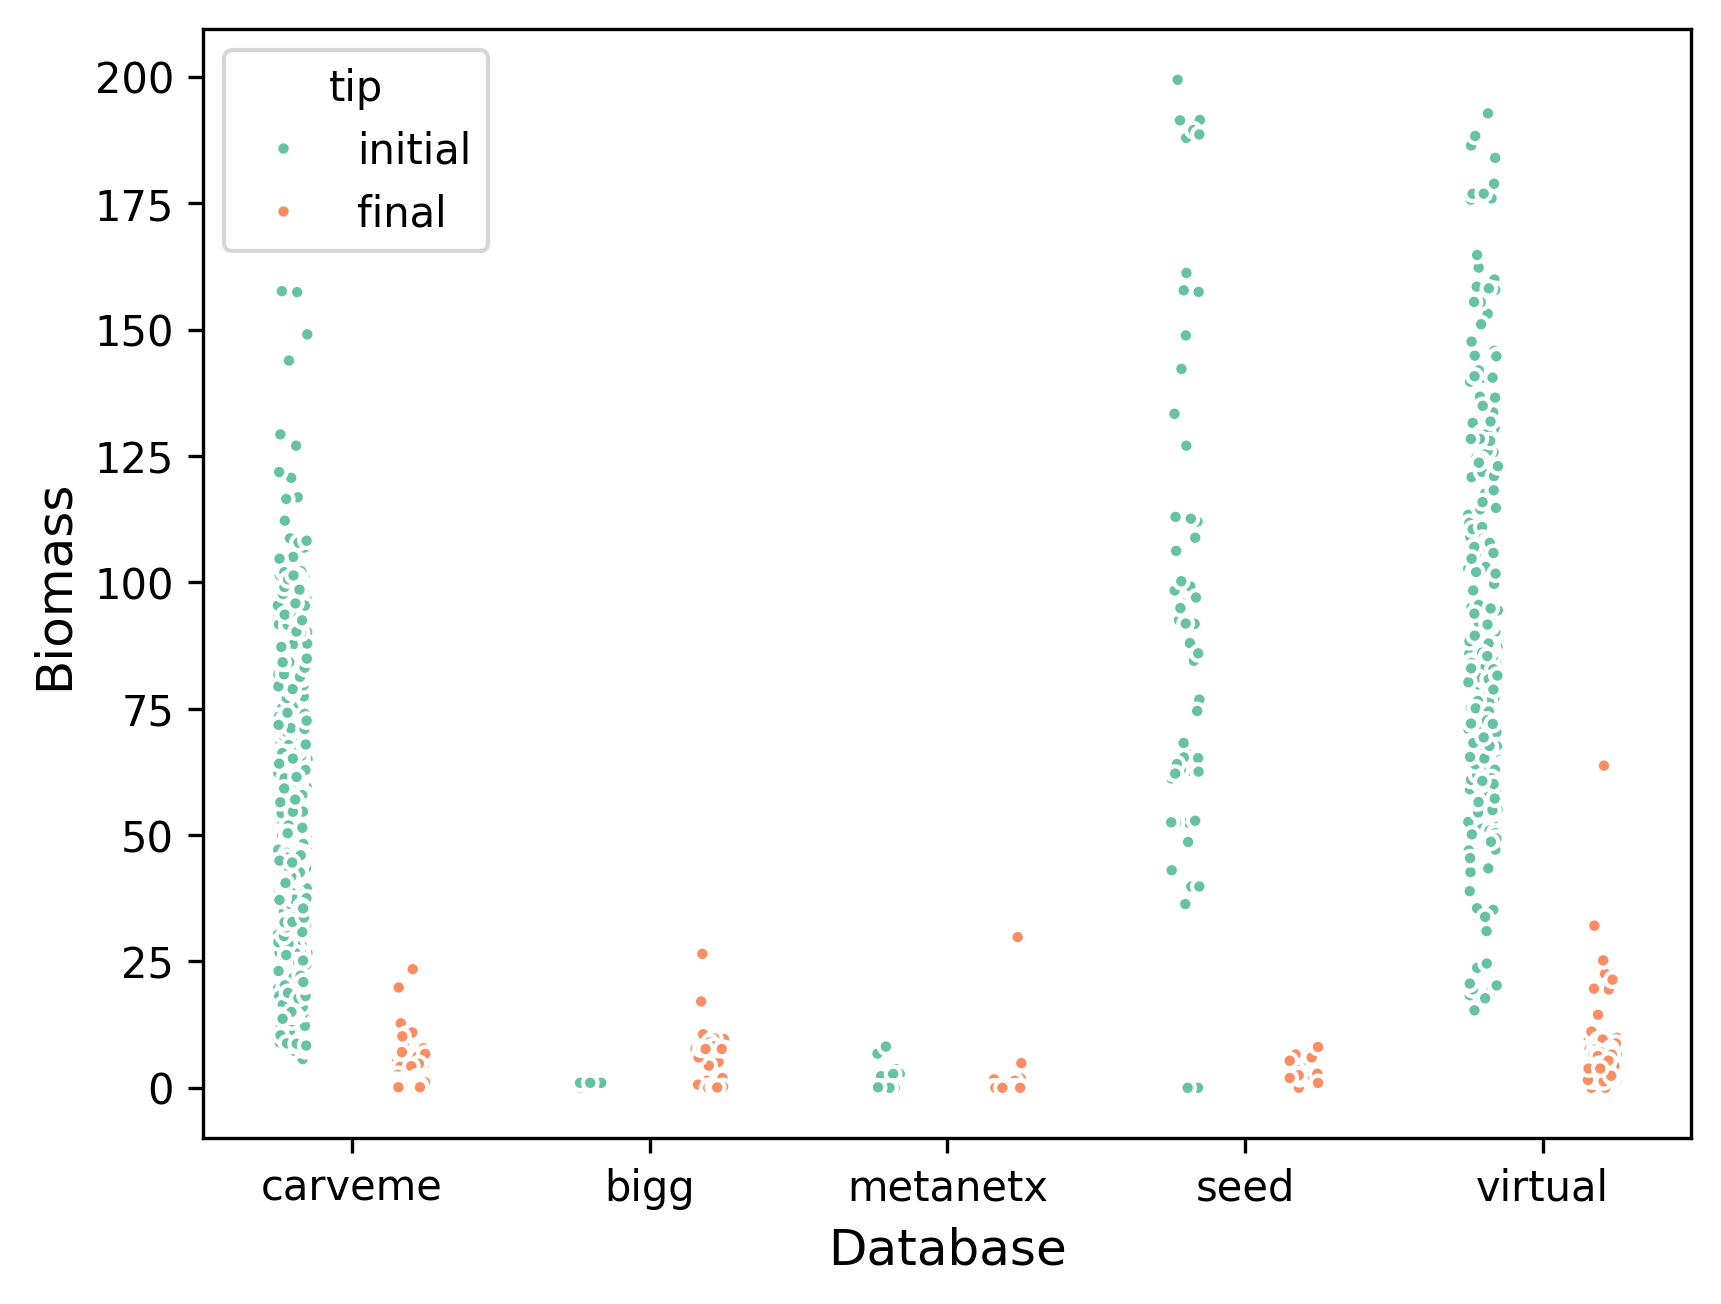

In [23]:
# 1、stripplot()
# 按照不同类别对样本数据进行分布散点图绘制

tips = pd.read_excel('/home/dengxiao/mqc/tmp/tips_analysis.xlsx')
print(tips.head())
# 加载数据
print(tips['database'].value_counts())
plt.figure(dpi=300)
# tips
sns.stripplot(x="database",          # x → 设置分组统计字段
              y="biomass",   # y → 数据分布统计字段
              # 这里xy数据对调，将会使得散点图横向分布
              data=tips,        # data → 对应数据
              jitter = True,    # jitter → 当点数据重合较多时，用该参数做一些调整，也可以设置间距如：jitter = 0.1
              size = 7, edgecolor = 'w',linewidth=1,marker = '.',  # 设置点的大小、描边颜色或宽度、点样式
              hue="tip",
              palette="Set2",  # 设置调色盘
              dodge=True,  # 是否拆分
              )
# plt.figure(dpi=300)
plt.xlabel("Database", size =12)
plt.ylabel("Biomass", size =12)


In [60]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
bigg_df = pd.read_excel('/home/dengxiao/mqc/tmp/bigg_analysis_check.xlsx')
seed_df = pd.read_excel('/home/dengxiao/mqc/tmp/GCF_modelseed_analysis_check.xlsx')
metanetx_df = pd.read_excel('/home/dengxiao/mqc/tmp/metanetx_analysis_check.xlsx')
virtual_df = pd.read_excel('/home/dengxiao/mqc/tmp/virtual_analysis_check.xlsx')
carveme_df = pd.read_excel('/home/dengxiao/mqc/tmp/web_CARVEME_COMMEN_check.xlsx')
virtual_df

,model,reducing_power,energy,metabolite,yield,biomass,all
0,Abiotrophia_defectiva_ATCC_49176,1,1,1,1,0,0
1,Achromobacter_xylosoxidans_A8,1,1,1,1,0,0
2,Achromobacter_xylosoxidans_NBRC_15126,1,1,1,0,0,0
3,Acidaminococcus_fermentans_DSM_20731,1,1,1,1,0,0
4,Acidaminococcus_intestini_RyC_MR95,1,1,1,1,0,0
...,...,...,...,...,...,...,...
813,Yersinia_bercovieri_ATCC_43970,1,1,1,1,0,0
814,Yersinia_enterocolitica_subsp_enterocolitica_8081,1,1,1,1,0,0
815,Yersinia_kristensenii_ATCC_33638,0,1,1,1,0,0
816,Yersinia_rohdei_ATCC_43380,1,1,1,1,0,0


获取每个数据库有问题的数量

In [10]:
virtual_count = len(virtual_df)
# print(virtual_df.groupby(['reducing_power']).count()['model'][1])
def get_ones_percentage(df, power):
    total_count = len(df['model'])
    ones_count = df[power].sum()
    zeros_count = total_count - ones_count
    ones_percentage = (ones_count / total_count) * 100
    zeros_percentage = (zeros_count / total_count) * 100
    # percentage_count = '{:.2f}%'.format(zeros_percentage)
    # return round(zeros_percentage,1)
    return zeros_count
reducing_power_percentage = get_ones_percentage(seed_df, 'reducing_power')
energy_percentage = get_ones_percentage(seed_df, 'energy')
metabolite_percentage = get_ones_percentage(seed_df, 'metabolite')
yield_percentage = get_ones_percentage(seed_df, 'yield')
biomass_percentage = get_ones_percentage(seed_df, 'biomass')
all_percentage = get_ones_percentage(carveme_df, 'all')
len(bigg_df),len(seed_df),len(metanetx_df),len(virtual_df),len(carveme_df)



(103, 79, 226, 818, 5587)

In [22]:
reducing_power_percentage,energy_percentage,metabolite_percentage,yield_percentage,biomass_percentage,all_percentage

(52, 52, 48, 59, 79, 5406)

将各个数据库的数据归一化处理

In [11]:
data = {
    'bigg_data': [2.9, 6.8, 6.8, 11.7, 37.9],
    'seed_data': [65.8, 65.8, 60.8, 74.7, 100.0],
    'metanetx_data': [31.9, 80.1, 51.8, 8.9, 100.0],
    'virtual_data': [21.0, 0.0, 0.49, 14.7, 100.0],
    'carveme_data': [21.2, 3.2, 10.6, 14.2, 94.9]
}
# 'reducing_power': [2.91, 100.0, 31.86, 21.03, 21.19],
# 'energy': [6.8, 100.0, 80.09, 0.0, 3.15],
# 'metabolite': [6.8, 100.0, 51.77, 0.49, 10.56],
# 'yield': [11.65, 100.0, 8.85, 14.67, 14.23],
# 'biomass': [37.86, 100.0, 100.0, 100.0, 94.85]
# 归一化处理
for key in data:
    total = 0
    for val in data[key]:
        total += val
    data[key] = [round(val / total * 100, 1) for val in data[key]]

data


{'bigg_data': [4.4, 10.3, 10.3, 17.7, 57.3],
 'seed_data': [17.9, 17.9, 16.6, 20.3, 27.2],
 'metanetx_data': [11.7, 29.4, 19.0, 3.3, 36.7],
 'virtual_data': [15.4, 0.0, 0.4, 10.8, 73.4],
 'carveme_data': [14.7, 2.2, 7.4, 9.9, 65.9]}

将归一化后的数据转置，放入还原力、能量的列表

In [11]:
data = [
    [4.4, 10.3, 10.3, 17.7, 57.3],
  [17.9, 17.9, 16.6, 20.3, 27.2],
  [11.7, 29.4, 19.0, 3.3, 36.7],
 [15.4, 0.0, 0.4, 10.8, 73.4],
  [14.7, 2.2, 7.4, 9.9, 65.9]
]

transposed_data = list(map(list, zip(*data)))

transposed_data


[[4.4, 17.9, 11.7, 15.4, 14.7],
 [10.3, 17.9, 29.4, 0.0, 2.2],
 [10.3, 16.6, 19.0, 0.4, 7.4],
 [17.7, 20.3, 3.3, 10.8, 9.9],
 [57.3, 27.2, 36.7, 73.4, 65.9]]

<Figure size 1920x1440 with 0 Axes>

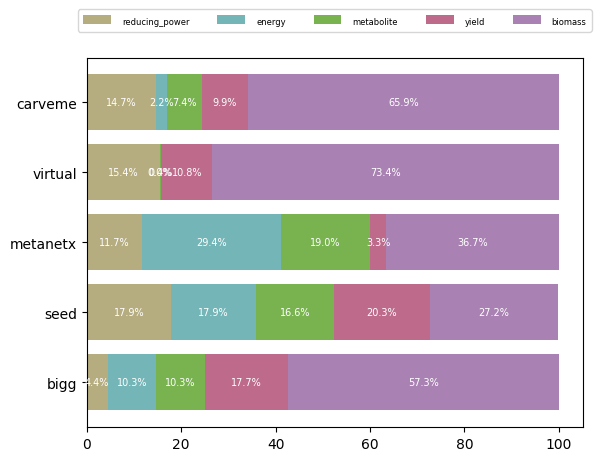

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['bigg', 'seed', 'metanetx', 'virtual', 'carveme']
data = {
    'reducing_power': [4.4, 17.9, 11.7, 15.4, 14.7],
 'energy': [10.3, 17.9, 29.4, 0.0, 2.2],
 'metabolite': [10.3, 16.6, 19.0, 0.4, 7.4],
 'yield': [17.7, 20.3, 3.3, 10.8, 9.9],
 'biomass': [57.3, 27.2, 36.7, 73.4, 65.9]
}

# 绘图
bar_width = 0.8
bar_position = np.arange(len(categories))
plt.figure(dpi=300)
# 创建绘图
fig, ax = plt.subplots()

# 遍历每个数据项，绘制柱形图
bottom = None
colors = ['#b5ac7f', '#74b5b8', '#78b350', '#bd6a8b', '#a982b3']
for i, (label, values) in enumerate(data.items()):
    if bottom is None:
        bars = ax.barh(bar_position, values, height=bar_width, color=colors[i], label=label)
        bottom = np.array(values)
    else:
        bars = ax.barh(bar_position, values, height=bar_width, color=colors[i], label=label, left=bottom)
        bottom += np.array(values)
    
    # 显示百分比
    for j, rect in enumerate(bars):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2, f'{values[j]}%', ha='center', va='center', color='white', fontsize=7)

# 设置y轴标签
ax.set_yticks(bar_position)
ax.set_yticklabels(categories)

# 添加图例
# ax.legend()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
# 添加图例并设置字体大小
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
for text in legend.get_texts():
    text.set_fontsize(6)  # 设置图例字体大小为12
# 将图例放置在图形右侧外部
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# 显示图形
# plt.figure(dpi=300)
plt.show()


   biomass      tip database  size
0    0.000  initial     bigg     3
1    0.185  initial     bigg     3
2    0.000  initial     bigg     3
3    0.208  initial     bigg     3
4    0.000  initial     bigg     3
bigg    190
Name: database, dtype: int64


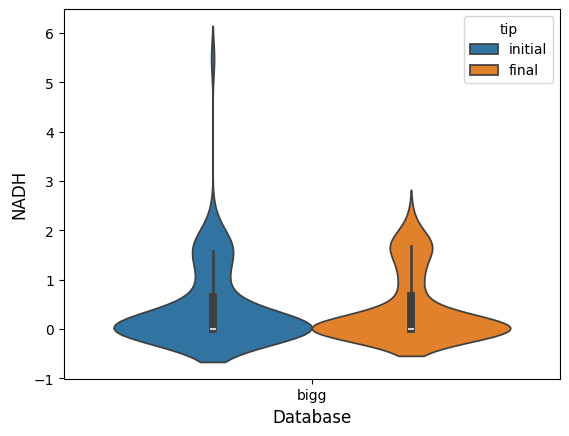

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = pd.read_excel('/home/dengxiao/mqc/tmp/tips_analysis.xlsx')
print(tips.head())
# 加载数据
print(tips['database'].value_counts())
# plt.figure(dpi=300)

# tips
sns.violinplot(x="database",          # x → 设置分组统计字段
              y="biomass",   # y → 数据分布统计字段
              # 这里xy数据对调，将会使得散点图横向分布
              data=tips,        # data → 对应数据
            #   jitter = True,    # jitter → 当点数据重合较多时，用该参数做一些调整，也可以设置间距如：jitter = 0.1
            #   size = 5, edgecolor = 'w',linewidth=1,marker = '.',  # 设置点的大小、描边颜色或宽度、点样式
              # split=True,
              hue="tip",
            #   inner=None,
              # bw_method=0.01,
            #   palette="Set2",  # 设置调色盘
              )
plt.xlabel("Database", size =12)
plt.ylabel("NADH", size =12)
# # 创建示例数据集
# data = sns.load_dataset("tips")

# # 绘制小提琴图
# sns.violinplot(x="day", y="total_bill", data=data)

# 显示图形
plt.show()


In [14]:
import pandas as pd


def sum(x, y, z):
    print(z)
    return x + y + z


df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})
print(df)
df1 = df.apply(sum, args=(3, 2))
print(df1)

   A   B
0  1  10
1  2  20
2
2
   A   B
0  6  15
1  7  25


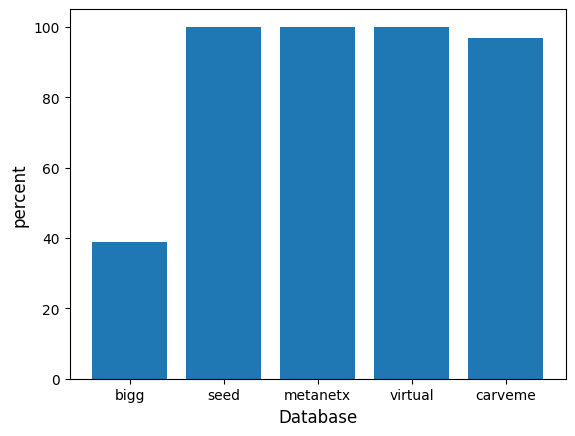

<Figure size 1920x1440 with 0 Axes>

In [16]:
N=100
# x=np.random.randn(N)
# y=np.random.randn(N)
x=['bigg', 'seed', 'metanetx', 'virtual', 'carveme']
y=[38.8, 100.0, 100.0, 100.0, 96.8]
plt.bar(x,y)
# plt.savefig('./test.png',dpi=300)
# plt.scatter(x,y,marker='x',color='r')
plt.xlabel("Database", size =12)
plt.ylabel("percent", size =12)
plt.figure(dpi=300)
plt.show()


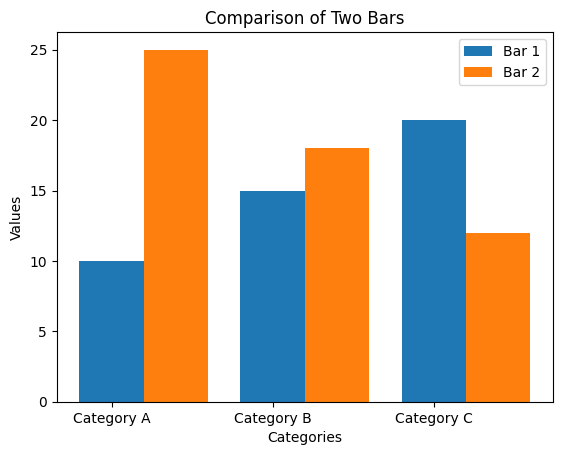

In [4]:

categories = ['Category A', 'Category B', 'Category C']
values1 = [10, 15, 20]  # 第一个柱形的高度
values2 = [25, 18, 12]  # 第二个柱形的高度

width = 0.4  # 柱形的宽度

plt.bar(categories, values1, width=width, label='Bar 1')
plt.bar([x + width for x in range(len(categories))], values2, width=width, label='Bar 2')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of Two Bars')
plt.legend()  # 显示图例

plt.show()


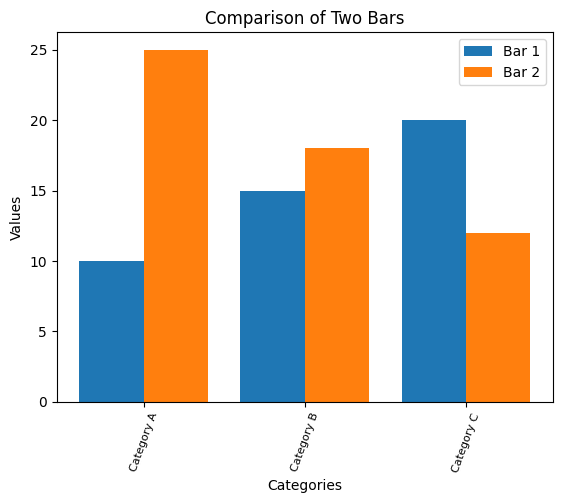

In [15]:

import numpy as np

categories = ['Category A', 'Category B', 'Category C']
values1 = [10, 15, 20]  # 第一个柱形的高度
values2 = [25, 18, 12]  # 第二个柱形的高度

width = 0.4  # 柱形的宽度

x = np.arange(len(categories))  # 横坐标位置
x_middle = x + width / 2  # 位于两个柱形中间的横坐标位置

plt.bar(x_middle, values1, width=width, label='Bar 1')
plt.bar(x_middle + width, values2, width=width, label='Bar 2')

plt.xticks(x_middle + width / 2, categories)  # 设置刻度位置和标签
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of Two Bars')
plt.legend()  # 显示图例
plt.xticks(rotation=70, ha='center')
plt.xticks(fontsize=8)
plt.show()


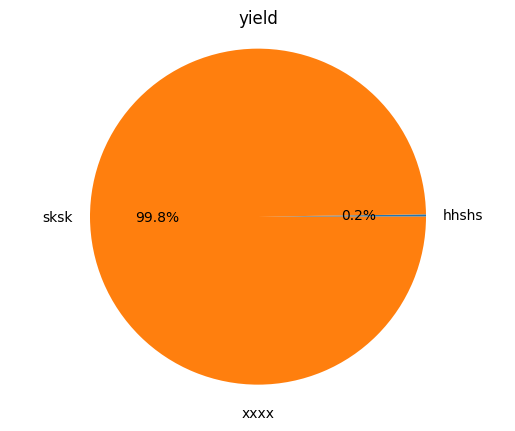

In [42]:
# nums=[25,37,33,37,6,19]
# lables=['hhshs','cjscsj','hshshs','hshshs','hshshs','hshshs']
nums=[2,905]
lables=['hhshs','sksk']
plt.pie(nums,labels=lables,autopct='%1.1f%%')
plt.axis('equal')
# plt.legend()
plt.title('yield')
plt.xlabel('xxxx')
plt.savefig('net.png',dpi=300)
plt.show()

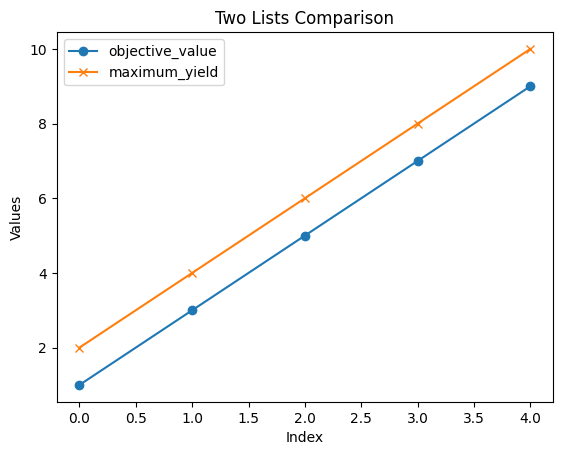

In [5]:
import matplotlib.pyplot as plt

# 两个示例列表
list1 = [1, 3, 5, 7, 9]
list2 = [2, 4, 6, 8, 10]

# 创建一个图表
plt.figure()

# 画第一个折线图
plt.plot(list1, label='objective_value', marker='o')

# 画第二个折线图
plt.plot(list2, label='maximum_yield', marker='x')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('Two Lists Comparison')
plt.xlabel('Index')
plt.ylabel('Values')

# 显示图表
plt.show()
